# Homework 1

In [1]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [183]:
# training sample size N, test size N_test, process repitition M
N = 100
N_test = 20
M = 10

def Y_plot(x):
    # f(x) + errors
#     f = 3 * (np.sin(x) ** 2) * np.cos(x) + np.sin(x)
#     f = norm_dist.cdf(x)
#     f = 0.5 * np.sin(x)
    f = x ** 2
    y = f + np.random.normal(0, 5, size=len(x))
    # Classification
    return y, f
#     return f + np.random.normal(0, 2, size=len(x))

def draw_data_plot(N, N_test, sparsity=10):
    low = - sparsity * np.pi
    high = - low

    X_train = np.random.uniform(low=low, high=high, size=N)
    X_test = np.random.uniform(low=low, high=high, size=N_test)
    
    Y_train, f_train = Y_plot(X_train)
    Y_test, f_test = Y_plot(X_test)
    
    class_train = Y_train > f_train
    class_test = Y_test > f_test
    
    return ((X_train, Y_train, class_train), (X_test, Y_test, class_test))

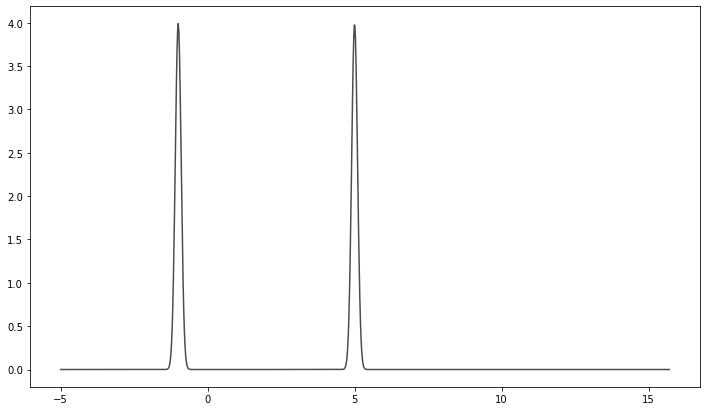

In [596]:
(X_train1, Y_train1, class_train1), (X_test1, Y_test1, class_test1) = draw_data_plot(500, 100, sparsity=10)

x_true = np.linspace(0, 10 * np.pi, 1000)
x_true = np.linspace(-5, 5 * np.pi, 1000)
# y_true = 3 * (np.sin(x_true) ** 2) * np.cos(x_true) + np.sin(x_true)
y_true = stats.norm.pdf(x_true, -1, .1) + stats.norm.pdf(x_true, 5, .1)

plt.figure(figsize=(12, 7))
plt.plot(x_true, y_true, "black", alpha = 0.7)
# plt.scatter(X_train1[np.where(class_train1 == 1)], Y_train1[np.where(class_train1 == 1)])
# plt.scatter(X_train1[np.where(class_train1 == 0)], Y_train1[np.where(class_train1 == 0)])

In [711]:
def Y(x):
    # f(x) + errors
    f = 3 * (np.sin(x) ** 2) * np.cos(x) + np.sin(x)
#     f = norm_dist.cdf(x)
#     f = 0.5 * np.sin(x)
    y = f + np.random.normal(0, 0.01, size=len(x))
    # Classification
#     return x > 2
    return y

def draw_data(N, N_test, sparsity=10):
    low = - sparsity * np.pi
    high = - low

    X_train = np.random.uniform(low=low, high=high, size=N)
#     X_train = np.random.randint(low=low, high=high, size=N)
#     X_train = np.random.normal(1, .5, N) + np.random.normal(3, .5, N)
#     X_train = np.random.binomial(10, 80/100, N)
    X_test = np.random.uniform(low=low, high=high, size=N_test)
#     X_test = np.random.randint(low=low, high=high, size=N_test)
#     X_test = np.random.normal(1, .5, N_test) + np.random.normal(3, .5, N_test)
#     X_test = np.random.binomial(10, 80/100, N_test)
    
    Y_train = Y(X_train)
    Y_test = Y(X_test)
    
    return ((X_train, Y_train), (X_test, Y_test))

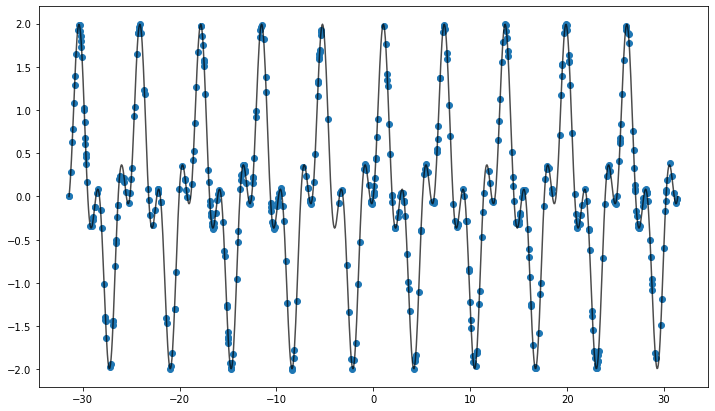

In [721]:
(X_train1, Y_train1), (X_test1, Y_test1) = draw_data(500, 100, sparsity=10)

x_true = np.linspace(-10 * np.pi, 10 * np.pi, 1000)
y_true = 3 * (np.sin(x_true) ** 2) * np.cos(x_true) + np.sin(x_true)
# y_true = stats.norm.pdf(x_true, -1, .1) + stats.norm.pdf(x_true, 5, .1)

plt.figure(figsize=(12, 7))
plt.plot(x_true, y_true, "black", alpha = 0.7)
plt.scatter(X_train1, Y_train1)
# plt.scatter(X_test1, Y_test1)
# plt.scatter(X_train1[np.where(class_train1 == 1)], Y_train1[np.where(class_train1 == 1)])
# plt.scatter(X_train1[np.where(class_train1 == 0)], Y_train1[np.where(class_train1 == 0)])

In [712]:
mse_compare = []
for i in range(10):
    mse_1nn_lst = []
    mse_2nn_lst = []
    for rep in range(500):
        # draw N training sample from (X, Y) and N_test testing sample
        (X_train, Y_train), (X_test, Y_test) = draw_data(500, 100, sparsity=10)

        X_train = np.array(X_train).reshape(-1, 1)
        X_test = np.array(X_test).reshape(-1, 1)
        # train 1nn and 2nn model on training
        # Create the 1nn and 2nn models.
        knn1 = KNeighborsRegressor(n_neighbors=1)
        knn2 = KNeighborsRegressor(n_neighbors=2)
        # Fit the model on the training data.
        knn1.fit(X_train, Y_train)
        knn2.fit(X_train, Y_train)

        # Make point predictions on the test set using the fit model.
        predictions_1nn = knn1.predict(X_test)
        predictions_2nn = knn2.predict(X_test)

        # calculate prediction error on N_test set (MSE over test set)
        mse_1nn = (((predictions_1nn - Y_test) ** 2).sum()) / len(predictions_1nn)
        mse_2nn = (((predictions_2nn - Y_test) ** 2).sum()) / len(predictions_2nn)
        mse_1nn_lst.append(mse_1nn)
        mse_2nn_lst.append(mse_2nn)
        
    se_1nn = np.std(mse_1nn_lst) / np.sqrt(m) # divide by sqrt of m
    se_2nn = np.std(mse_2nn_lst) / np.sqrt(m)
    final_val_1nn = np.mean(mse_1nn_lst) + 2 * se_1nn
    final_val_2nn = np.mean(mse_2nn_lst) - 2 * se_2nn
    mse_compare.append(final_val_1nn - final_val_2nn) # we want to see negative numbers
    

# NEED TO DO SOMETHING WITH SE???
# We want the estimated expected squared error of 1-NN + 2(SE) to be < the expected squared error of 2-NN - 2(SE)

In [713]:
se_1nn = np.std(mse_1nn_lst) / np.sqrt(m)
se_2nn = np.std(mse_2nn_lst) / np.sqrt(m)
final_val_1nn = np.mean(mse_1nn_lst) + 2 * se_1nn
final_val_2nn = np.mean(mse_2nn_lst) - 2 * se_2nn

# We want final_val_1nn < final_val_2nn
final_val_1nn, final_val_2nn

(0.026667350200042787, 0.026825634976547195)

In [714]:
mse_compare, np.mean(mse_compare)
# Nice - all negative meaning that we found a solution where 1NN works better than 2NN
# N = 500, N_test = 100, M = 50, (X, Y) from 3 * (np.sin(x) ** 2) * np.cos(x) + np.sin(x) + np.random.normal(0, 0.01, size=len(x))

([-0.00032648290067658486,
  -0.00023479435289640999,
  -0.0011755798436862072,
  -0.0006718297545338925,
  -0.000845994268664961,
  -0.000610339119403995,
  -0.0008857129495284458,
  -0.000665779615078143,
  -0.0004187563127042125,
  -0.0001582847765044075],
 -0.000599355389367726)

We found $N = 500, N_{test} = 100, M = 50$ and $(X, Y)$ is drawn from from $3 sin(x)^2 cos(x) + sin(x) + \epsilon$ where $\epsilon \sim \mathcal{N}(0, .0001)$.

# Homework 2

Problem 4

In [95]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

In [128]:
# Trying to estimate the mean of a N(mu, c^2) var
# method_1 # mean
# method_2 # max
# method_3 # 10-fold CV to choose between m1 and m2
# best "test" accuracy to select

def se_loss(y, y_hat):
    return (y - y_hat)**2

def method1(X, y):
    rfc = RandomForestClassifier(max_depth=2, random_state=0)
    rfc.fit(X, y.reshape(len(y),))
#     y_hat = np.mean(X)
#     return np.full((len(X), 1), y_hat)
    return rfc

def method2(X, y):
#     y_hat = np.median(X)
#     return np.full((len(X), 1), y_hat)
    knn = KNeighborsRegressor(n_neighbors=10)
    knn.fit(X, y)
    return knn

def method3(X, y):
    # 10-fold CV
    kf = KFold(10)
    mses_m1 = []
    mses_m2 = []
    models = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = y[train_index], y[test_index]

        method1_cl = method1(X_train, Y_train)
        method1_test = method1_cl.predict(X_test)
        method2_cl = method2(X_train, Y_train)
        method2_test = method2_cl.predict(X_test)
        
        # Loss
        mse1 = np.mean(se_loss(Y_test, method1_test))
        mse2 = np.mean(se_loss(Y_test, method2_test))
        mses_m1.append(mse1)
        mses_m2.append(mse2)
        if mse1 < mse2:
            models.append(method1_cl)
        else:
            models.append(method2_cl)
        
#     if np.mean(mses_m1) < np.mean(mses_m2):
#         # Use method1 estimate
#         return method1(X, y)
#     else:
#         return method2(X, y)
    return models
    
def method3_predict(X, model3):
    groups = np.array_split(X, 10)
    predictions = np.array([])
    for i, group in enumerate(groups):
        predictions = np.append(predictions, model3[i].predict(group))
        
    return predictions

In [127]:
def draw_XY(N, p_norm, mu, sigma):
    n_norms = int(N * p_norm)
    n_cauchy = N - n_norms
    
    X_norms = np.random.normal(mu, sigma, size=n_norms).reshape(-1, 1)
    y_norms = np.full((n_norms, 1), mu)
    X_cauchy = np.random.standard_cauchy(size=n_cauchy).reshape(-1, 1)
    y_cauchy = np.full((n_cauchy, 1), 0) # median of cauchy
    
    X = np.append(X_norms, X_cauchy)
    y = np.append(y_norms, y_cauchy)
    shuffled_ids = np.random.permutation(N)
    X = X[shuffled_ids]
    y = y[shuffled_ids]
    
    return X.reshape(-1, 1), y.reshape(-1, 1)

def draw_data(N, N_test, p_norm, mu, sigma):
    n_norms = int(N * p_norm)
    n_cauchy = N - n_norms
    
    X_train, Y_train = draw_XY(N, p_norm, mu, sigma)
    X_test, Y_test = draw_XY(N_test, p_norm, mu, sigma)
    
    return X_train, Y_train, X_test, Y_test

In [130]:
X_train, Y_train, X_test, Y_test = draw_data(N=500, N_test=100, p_norm=0.9, mu=10, sigma=1)

# Fit models
model1 = method1(X_train, Y_train)
model2 = method2(X_train, Y_train)
model3 = method3(X_train, Y_train)

y_hat1 = model1.predict(X_test)
y_hat2 = model2.predict(X_test)
y_hat3 = method3_predict(X_test, model3)
y_hat1.shape, y_hat2.shape, y_hat3.shape

((100,), (100, 1), (100,))

In [134]:
m = 10
mse_compare = []
for i in range(m):
    mses1 = []
    mses2 = []
    mses3 = []
    for rep in range(5):
        # draw N training sample from (X, Y) and N_test testing sample
        X_train, Y_train, X_test, Y_test = draw_data(N=200, N_test=50, p_norm=0.5, mu=10, sigma=1)

        # Fit models
        model1 = method1(X_train, Y_train)
        model2 = method2(X_train, Y_train)
        model3 = method3(X_train, Y_train)
        
        y_hat1 = model1.predict(X_test)
        y_hat2 = model2.predict(X_test)
        y_hat3 = method3_predict(X_test, model3)

        # calculate prediction error on N_test set (MSE over test set)
        mse1 = np.mean(se_loss(Y_test, y_hat1.reshape(-1, 1)))
        mse2 = np.mean(se_loss(Y_test, y_hat2.reshape(-1, 1)))
        mse3 = np.mean(se_loss(Y_test, y_hat3.reshape(-1, 1)))
        mses1.append(mse1)
        mses2.append(mse2)
        mses3.append(mse3)
        
    se1 = np.std(mses1) / np.sqrt(m) # divide by sqrt of m
    se2 = np.std(mses2) / np.sqrt(m)
    se3 = np.std(mses3) / np.sqrt(m)
    mean1 = np.mean(mses1)
    mean2 = np.mean(mses2)
    mean3 = np.mean(mses3)
    
    final_val1 = mean1 + 2 * se1
    final_val2 = mean2 + 2 * se2
    final_val3 = mean3 - 2 * se2
    print("1 vs. 3:", final_val1 - final_val3)
    print("2 vs. 3:", final_val2 - final_val3)

1 vs. 3: 0.5370609131972715
2 vs. 3: 0.8427671556081697
1 vs. 3: 0.21338736464152808
2 vs. 3: 1.1474200584966825
1 vs. 3: 1.4420856414357597
2 vs. 3: 1.8683135803637567
1 vs. 3: 2.306371036947927
2 vs. 3: 2.782032732323107
1 vs. 3: 0.7245260017805237
2 vs. 3: 0.7896973327746739
1 vs. 3: 2.6885063296157448
2 vs. 3: 1.8050901797759533
1 vs. 3: 1.5316242347892133
2 vs. 3: 2.54853912800568
1 vs. 3: 1.430615020742483
2 vs. 3: 2.014488341688014
1 vs. 3: 0.19526283553530321
2 vs. 3: 1.495171000284233
1 vs. 3: 1.7948658673226547
2 vs. 3: 2.1605862040534314


In [139]:
# Trying to estimate the mean of a N(mu, c^2) var
# method_1 # mean
# method_2 # max
# method_3 # 10-fold CV to choose between m1 and m2
# best "test" accuracy to select

def method1_v2(X):
    y_hat = np.mean(X)
    return np.full((len(X), 1), y_hat)

def method2_v2(X):
    y_hat = np.median(X)
    return np.full((len(X), 1), y_hat)

def method3_v2(X, y):
    # 10-fold CV
    kf = KFold(10)
    mses_m1 = []
    mses_m2 = []
    models = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = y[train_index], y[test_index]

        method1_train = method1_v2(X_train)
        method1_test = method1_v2(X_test)
        method2_train = method2_v2(X_train)
        method2_test = method2_v2(X_test)
        
        # Loss
        mse1 = np.mean(se_loss(Y_test, method1_test))
        mse2 = np.mean(se_loss(Y_test, method2_test))
        mses_m1.append(mse1)
        mses_m2.append(mse2)
        if mse1 < mse2:
            models.append("1")
        else:
            models.append("2")
        
    return models
    
def method3_v2_predict(X, model3):
    groups = np.array_split(X, 10)
    predictions = np.array([])
    for i, group in enumerate(groups):
        if model3[i] == "1":
            predictions = np.append(predictions, method1_v2(group))
        else:
            predictions = np.append(predictions, method2_v2(group))
        
    return predictions

In [150]:
m = 10
mse_compare = []
for i in range(m):
    mses1 = []
    mses2 = []
    mses3 = []
    for rep in range(5):
        # draw N training sample from (X, Y) and N_test testing sample
        X_train, Y_train, X_test, Y_test = draw_data(N=100, N_test=10, p_norm=0.3, mu=10, sigma=1)

        # Fit models
        predict1 = method1_v2(X_train)
        predict2 = method2_v2(X_train)
        model3 = method3_v2(X_train, Y_train)
        predict3 = method3_v2_predict(X_test, model3)

        # calculate prediction error on N_test set (MSE over test set)
        mse1 = np.mean(se_loss(Y_test, predict1[0:len(Y_test)]))
        mse2 = np.mean(se_loss(Y_test, predict2[0:len(Y_test)]))
        mse3 = np.mean(se_loss(Y_test, predict3))
        mses1.append(mse1)
        mses2.append(mse2)
        mses3.append(mse3)
        
    se1 = np.std(mses1) / np.sqrt(m) # divide by sqrt of m
    se2 = np.std(mses2) / np.sqrt(m)
    se3 = np.std(mses3) / np.sqrt(m)
    mean1 = np.mean(mses1)
    mean2 = np.mean(mses2)
    mean3 = np.mean(mses3)
    
    final_val1 = mean1 + 2 * se1
    final_val2 = mean2 + 2 * se2
    final_val3 = mean3 - 2 * se2
    print("1 vs. 3:", final_val1 - final_val3)
    print("2 vs. 3:", final_val2 - final_val3)

1 vs. 3: -135.2085320519671
2 vs. 3: -130.69964529323698
1 vs. 3: -793.3371437376343
2 vs. 3: -790.4710633193843
1 vs. 3: -19.417352709826016
2 vs. 3: -21.819707341402996
1 vs. 3: 1109.1070711353004
2 vs. 3: -454.2451050111606
1 vs. 3: -30.916148620038626
2 vs. 3: -38.896482465932365
1 vs. 3: -6352.4295482664365
2 vs. 3: -6348.491268422888
1 vs. 3: -38.833818686928495
2 vs. 3: -34.650388597943575
1 vs. 3: -28.79861088800179
2 vs. 3: -38.53748771823011
1 vs. 3: -198.4314222068931
2 vs. 3: -194.60494124039468
1 vs. 3: -13.04810231728181
2 vs. 3: -22.68145361084197
